In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


# SP500

In [ ]:
from IPython.core.macro import Macro
import pandas as pd

financials = pd.read_csv('/content/drive/MyDrive/Dissertation_Final /Data/Raw/sp500_financial_and_target.csv')
#financials = financials.drop('Unnamed: 0', axis=1) #dropping the past index
target = pd.read_csv('/content/drive/MyDrive/Dissertation_Final /Data/Raw/sp500_target_variables.csv')
general = pd.read_csv('/content/drive/MyDrive/Dissertation_Final /Data/Raw/sp500_general.csv')
macro = pd.read_csv('/content/drive/MyDrive/Dissertation_Final /Data/Raw/sp500_macro.csv')

In [ ]:
general.shape

(507, 6)

In [ ]:
# calculate percentage of NaN values in each column
nan_percent = general.isna().mean() * 100
print(nan_percent)

Instrument                  0.000000
Company Common Name         0.000000
Country of Headquarters     0.000000
TRBC Industry Group Name    0.000000
GICS Sector Name            1.775148
Currency                    0.197239
dtype: float64


In [ ]:
financials.shape

(10647, 22)

In [ ]:
# calculate percentage of NaN values in each column
nan_percent = financials.isna().mean() * 100
print(nan_percent)

Instrument                                                       0.000000
Date                                                             9.974641
Revenue                                                         10.115526
Gross Profit                                                    16.859209
EBIT                                                             0.497793
EBITDA                                                           0.535362
Total Assets                                                     0.413262
Total Liabilities                                                0.413262
Enterprise Value (Daily Time Series)                             0.911055
Free Cash Flow                                                   0.732601
P/E (Daily Time Series Ratio)                                    8.603362
Dividend yield                                                  23.480793
Net Profit Margin, (%)                                           0.347516
Current Ratio                         

In [ ]:
target.shape

(100907, 6)

In [ ]:
# calculate percentage of NaN values in each column
nan_percent = target.isna().mean() * 100
print(nan_percent)

Instrument                                                       0.000000
Forward Enterprise Value To EBITDA (Daily Time Series Ratio)     5.743903
Enterprise Value To EBITDA (Daily Time Series Ratio)             1.450841
EV / Free Cash Flow (SmartEstimate ®)                           18.158304
P/E (Daily Time Series Ratio)                                    6.909332
Forward P/E (Daily Time Series Ratio)                            1.610394
dtype: float64


### merging General and Financials

In [ ]:
df_a = general.merge(financials, on='Instrument') #DF A = genenral and financials
df_a.columns
print(df_a.shape)

(10605, 27)


In [ ]:
df_a = df_a.rename(columns={'Country of Headquarters': 'Country'})

In [ ]:
df_a.head(3)

,Instrument,Company Common Name,Country,TRBC Industry Group Name,GICS Sector Name,Currency,Date,Revenue,Gross Profit,EBIT,...,"Net Profit Margin, (%)",Current Ratio,Quick Ratio,Debt - Total,"Weighted Average Cost of Capital, (%)",Common Shares - Outstanding - Total,Enterprise Value To EBITDA (Daily Time Series Ratio),P/E (Daily Time Series Ratio).1,Forward P/E (Daily Time Series Ratio),Forward Enterprise Value To EBITDA (Daily Time Series Ratio)
0,POOL.OQ,Pool Corp,United States of America,Leisure Products,Consumer Discretionary,USD,2022-12-31T00:00:00Z,5.108471e+09,1.598255e+09,848463640.2,...,12.0444,2.98794,0.6333,1.146401e+09,7.254650,39069419.0,16.368874,22.168113,23.448844,16.911928
1,POOL.OQ,Pool Corp,United States of America,Leisure Products,Consumer Discretionary,USD,2022-12-31T00:00:00Z,5.108471e+09,1.598255e+09,848463640.2,...,12.0444,2.98794,0.6333,1.146401e+09,7.435952,39069419.0,13.817787,18.256700,20.439347,15.061007
2,POOL.OQ,Pool Corp,United States of America,Leisure Products,Consumer Discretionary,USD,2022-12-31T00:00:00Z,5.108471e+09,1.598255e+09,848463640.2,...,12.0444,2.98794,0.6333,1.146401e+09,7.349384,39069419.0,12.253686,15.386581,17.882349,13.454483


In [ ]:
df_a.columns

Index(['Instrument', 'Company Common Name', 'Country',
       'TRBC Industry Group Name', 'GICS Sector Name', 'Currency', 'Date',
       'Revenue', 'Gross Profit', 'EBIT', 'EBITDA', 'Total Assets',
       'Total Liabilities', 'Enterprise Value (Daily Time Series)',
       'Free Cash Flow', 'P/E (Daily Time Series Ratio)', 'Dividend yield',
       'Net Profit Margin, (%)', 'Current Ratio', 'Quick Ratio',
       'Debt - Total', 'Weighted Average Cost of Capital, (%)',
       'Common Shares - Outstanding - Total',
       'Enterprise Value To EBITDA (Daily Time Series Ratio)',
       'P/E (Daily Time Series Ratio).1',
       'Forward P/E (Daily Time Series Ratio)',
       'Forward Enterprise Value To EBITDA (Daily Time Series Ratio)'],
      dtype='object')

In [ ]:
# Convert 'Date' to datetime if it's not already
df_a['Date'] = pd.to_datetime(df_a['Date'])

# Create 'Year' and 'Month' columns
df_a['Year'] = df_a['Date'].dt.year
df_a['Month'] = df_a['Date'].dt.month

df_a

,Instrument,Company Common Name,Country,TRBC Industry Group Name,GICS Sector Name,Currency,Date,Revenue,Gross Profit,EBIT,...,Quick Ratio,Debt - Total,"Weighted Average Cost of Capital, (%)",Common Shares - Outstanding - Total,Enterprise Value To EBITDA (Daily Time Series Ratio),P/E (Daily Time Series Ratio).1,Forward P/E (Daily Time Series Ratio),Forward Enterprise Value To EBITDA (Daily Time Series Ratio),Year,Month
0,POOL.OQ,Pool Corp,United States of America,Leisure Products,Consumer Discretionary,USD,2022-12-31 00:00:00+00:00,5.108471e+09,1.598255e+09,848463640.2,...,0.63330,1.146401e+09,7.254650,39069419.0,16.368874,22.168113,23.448844,16.911928,2022.0,12.0
1,POOL.OQ,Pool Corp,United States of America,Leisure Products,Consumer Discretionary,USD,2022-12-31 00:00:00+00:00,5.108471e+09,1.598255e+09,848463640.2,...,0.63330,1.146401e+09,7.435952,39069419.0,13.817787,18.256700,20.439347,15.061007,2022.0,12.0
2,POOL.OQ,Pool Corp,United States of America,Leisure Products,Consumer Discretionary,USD,2022-12-31 00:00:00+00:00,5.108471e+09,1.598255e+09,848463640.2,...,0.63330,1.146401e+09,7.349384,39069419.0,12.253686,15.386581,17.882349,13.454483,2022.0,12.0
3,POOL.OQ,Pool Corp,United States of America,Leisure Products,Consumer Discretionary,USD,2021-12-31 00:00:00+00:00,3.914231e+09,1.195274e+09,613704418.6,...,0.57761,8.746732e+08,8.174267,40192901.0,13.399489,16.393181,17.202162,12.881602,2021.0,12.0
4,POOL.OQ,Pool Corp,United States of America,Leisure Products,Consumer Discretionary,USD,2021-12-31 00:00:00+00:00,3.914231e+09,1.195274e+09,613704418.6,...,0.57761,8.746732e+08,8.089161,40192901.0,16.015279,19.441600,18.501055,14.108127,2021.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10600,AVY.N,Avery Dennison Corp,United States of America,Containers & Packaging,Materials,USD,2018-12-29 00:00:00+00:00,5.634777e+09,1.507671e+09,598975490.0,...,0.82578,1.547576e+09,9.058420,84723655.0,12.235822,52.825054,16.858709,11.239285,2018.0,12.0
10601,AVY.N,Avery Dennison Corp,United States of America,Containers & Packaging,Materials,USD,2018-12-29 00:00:00+00:00,5.634777e+09,1.507671e+09,598975490.0,...,0.82578,1.547576e+09,9.309693,84723655.0,11.914155,21.255025,16.761666,10.864753,2018.0,12.0
10602,AVY.N,Avery Dennison Corp,United States of America,Containers & Packaging,Materials,USD,2018-12-29 00:00:00+00:00,5.634777e+09,1.507671e+09,598975490.0,...,0.82578,1.547576e+09,9.460627,84723655.0,10.058165,16.426748,13.585904,9.215337,2018.0,12.0
10603,AVY.N,Avery Dennison Corp,United States of America,Containers & Packaging,Materials,USD,2017-12-30 00:00:00+00:00,4.894741e+09,1.341173e+09,541664552.0,...,0.82579,1.170585e+09,8.580672,88011541.0,11.657364,21.804139,16.649144,10.855668,2017.0,12.0


### merging with macro

In [ ]:
df_b = df_a.merge(macro, left_on=['Country', 'Year'], right_on=['Country', 'Year'])
df_b.columns

Index(['Instrument', 'Company Common Name', 'Country',
       'TRBC Industry Group Name', 'GICS Sector Name', 'Currency', 'Date',
       'Revenue', 'Gross Profit', 'EBIT', 'EBITDA', 'Total Assets',
       'Total Liabilities', 'Enterprise Value (Daily Time Series)',
       'Free Cash Flow', 'P/E (Daily Time Series Ratio)', 'Dividend yield',
       'Net Profit Margin, (%)', 'Current Ratio', 'Quick Ratio',
       'Debt - Total', 'Weighted Average Cost of Capital, (%)',
       'Common Shares - Outstanding - Total',
       'Enterprise Value To EBITDA (Daily Time Series Ratio)',
       'P/E (Daily Time Series Ratio).1',
       'Forward P/E (Daily Time Series Ratio)',
       'Forward Enterprise Value To EBITDA (Daily Time Series Ratio)', 'Year',
       'Month', 'Unnamed: 0', 'GDP', 'stock traded percentage of gpd',
       'Inflation, consumer prices annual percentage',
       'Unemployment total (pcg of total labor force) (national estimate)',
       ' General government gross debt (% of GDP)

In [ ]:
# Step 3: Rename columns to more understandable names
df_b = df_b.rename(columns={
    'Country': 'Country',
    'Company Common Name': 'Name',
    'Debt - Total': 'Total Debt',
    'Enterprise Value (Daily Time Series)':'Enterprise Value',
    'Weighted Average Cost of Capital, (%)':'WACC pct',
    'Common Shares - Outstanding - Total' : 'Outstanding Tot Shares',
    'P/E (Daily Time Series Ratio)': 'PE Ratio',
    'Dividend yield': 'Dividend Yield',
    'Net Profit Margin, (%)': 'Net Profit Margin pct',
    'stock traded percentage of gpd':'Stock traded pct GDP',
    'Inflation, consumer prices annual percentage':'Inflation pct',
    'Unemployment total (pcg of total labor force) (national estimate)':'Unemployment Rate pct',
    ' General government gross debt (% of GDP)': 'Government Debt pct GDP',
    'Official exchange rate (LCU per US$, period average)': 'Exchange Rate USD',
    'General government final consumption expenditure (% of GDP)': 'Government Consumption pct GDP',
    'Enterprise Value To EBITDA (Daily Time Series Ratio)': 'EV/EBITDA',
    'Forward Enterprise Value To EBITDA (Daily Time Series Ratio)':'Forward EV/EBITDA',
    'P/E (Daily Time Series Ratio).1':'P/E',
    'Forward P/E (Daily Time Series Ratio)':'Forward P/E'
})

df_b.columns

Index(['Instrument', 'Name', 'Country', 'TRBC Industry Group Name',
       'GICS Sector Name', 'Currency', 'Date', 'Revenue', 'Gross Profit',
       'EBIT', 'EBITDA', 'Total Assets', 'Total Liabilities',
       'Enterprise Value', 'Free Cash Flow', 'PE Ratio', 'Dividend Yield',
       'Net Profit Margin pct', 'Current Ratio', 'Quick Ratio', 'Total Debt',
       'WACC pct', 'Outstanding Tot Shares', 'EV/EBITDA', 'P/E', 'Forward P/E',
       'Forward EV/EBITDA', 'Year', 'Month', 'GDP', 'Stock traded pct GDP',
       'Inflation pct', 'Unemployment Rate pct', 'Government Debt pct GDP',
       'Balance of Trade', 'Exchange Rate USD',
       'Government Consumption pct GDP'],
      dtype='object')

### Data checkpoint

In [ ]:
df_b = df_b.drop('Unnamed: 0', axis=1) #dropping the past index #NB !!
df_b.to_csv('sp500_fundamental_and_macro')

In [ ]:
df_b.head(3)

,Instrument,Name,Country,TRBC Industry Group Name,GICS Sector Name,Currency,Date,Revenue,Gross Profit,EBIT,...,Year,Month,GDP,Stock traded pct GDP,Inflation pct,Unemployment Rate pct,Government Debt pct GDP,Balance of Trade,Exchange Rate USD,Government Consumption pct GDP
0,POOL.OQ,Pool Corp,United States of America,Leisure Products,Consumer Discretionary,USD,2022-12-31 00:00:00+00:00,5.108471e+09,1.598255e+09,848463640.2,...,2022.0,12.0,76398.591742,193.056616,8.0028,3.65,76.964824,-9.453230e+11,1.0,10.296068
1,POOL.OQ,Pool Corp,United States of America,Leisure Products,Consumer Discretionary,USD,2022-12-31 00:00:00+00:00,5.108471e+09,1.598255e+09,848463640.2,...,2022.0,12.0,76398.591742,193.056616,8.0028,3.65,76.964824,-9.453230e+11,1.0,10.296068
2,POOL.OQ,Pool Corp,United States of America,Leisure Products,Consumer Discretionary,USD,2022-12-31 00:00:00+00:00,5.108471e+09,1.598255e+09,848463640.2,...,2022.0,12.0,76398.591742,193.056616,8.0028,3.65,76.964824,-9.453230e+11,1.0,10.296068


In [ ]:
df_b.shape

(9269, 37)

# EDA pt2

In [ ]:
df_b.shape

(9269, 37)

In [ ]:
# calculate percentage of NaN values in each column
nan_percent = df_b.isna().mean() * 100
print(nan_percent)

Instrument                         0.000000
Name                               0.000000
Country                            0.000000
TRBC Industry Group Name           0.000000
GICS Sector Name                   1.521200
Currency                           0.000000
Date                               0.000000
Revenue                            0.161830
Gross Profit                       7.659942
EBIT                               0.172618
EBITDA                             0.172618
Total Assets                       0.280505
Total Liabilities                  0.280505
Enterprise Value                   0.658108
Free Cash Flow                     0.204984
PE Ratio                           8.965368
Dividend Yield                    25.633833
Net Profit Margin pct              0.000000
Current Ratio                      9.353760
Quick Ratio                        9.353760
Total Debt                         1.402525
WACC pct                           2.470601
Outstanding Tot Shares          

## Checking the time line


In [ ]:
# Calculate the number of unique months and years
num_unique_months = df_b['Month'].nunique()
num_unique_years = df_b['Year'].nunique()

# Display the results
print(f"Number of unique months: {num_unique_months}")
print(f"Number of unique years: {num_unique_years}")

Number of unique months: 12
Number of unique years: 7


In [ ]:
# Get the unique months and years
unique_months = df_b['Month'].unique()
unique_years = df_b['Year'].unique()

# Display the unique months and years
print("Unique Months:")
print(unique_months)

print("\nUnique Years:")
print(unique_years)
vars

Unique Months:
[12.  6.  1.  4.  8. 10.  5.  9.  7.  3. 11.  2.]

Unique Years:
[2022. 2021. 2020. 2019. 2018. 2017. 2016.]


<function vars>

In [ ]:
# Group by 'Year' and count the number of unique months for each year
months_per_year = df_b.groupby('Year')['Month'].unique()

# Display the result
print(months_per_year)

Year
2016.0                                         [11.0, 12.0]
2017.0    [12.0, 6.0, 9.0, 10.0, 8.0, 7.0, 11.0, 5.0, 3....
2018.0    [12.0, 6.0, 1.0, 3.0, 9.0, 5.0, 10.0, 8.0, 2.0...
2019.0    [12.0, 6.0, 2.0, 3.0, 9.0, 5.0, 10.0, 8.0, 11....
2020.0    [12.0, 6.0, 2.0, 3.0, 8.0, 10.0, 5.0, 9.0, 7.0...
2021.0    [12.0, 6.0, 1.0, 4.0, 8.0, 10.0, 5.0, 9.0, 7.0...
2022.0    [12.0, 6.0, 1.0, 4.0, 8.0, 10.0, 5.0, 9.0, 7.0...
Name: Month, dtype: object


In [ ]:
# Define a list of all months (from 1 to 12)
all_months = list(range(1, 13))

# Check if every year has all twelve months
for year, months in months_per_year.items():
    if set(months) == set(all_months):
        print(f"For the year {year}: All twelve months are present.")
    else:
        print(f"For the year {year}: Some months are missing.")

For the year 2016.0: Some months are missing.
For the year 2017.0: Some months are missing.
For the year 2018.0: All twelve months are present.
For the year 2019.0: All twelve months are present.
For the year 2020.0: All twelve months are present.
For the year 2021.0: All twelve months are present.
For the year 2022.0: All twelve months are present.


In [ ]:
# Group by 'Year' and calculate the number of data points (rows) for each year
data_points_per_year = df_b.groupby('Year').size()
print(data_points_per_year)

Year
2016.0      12
2017.0    1046
2018.0    1754
2019.0    1767
2020.0    1740
2021.0    1785
2022.0    1165
dtype: int64


In [ ]:
# Group by 'Year' and count the number of unique instruments for each year
unique_instruments_per_year = df_b.groupby('Year')['Instrument'].nunique()
print(unique_instruments_per_year)

Year
2016.0      7
2017.0    402
2018.0    445
2019.0    442
2020.0    435
2021.0    446
2022.0    439
Name: Instrument, dtype: int64


In [ ]:
# Group by 'Year' and get a list of unique instruments for each year
unique_instruments_list_per_year = df_b.groupby('Year')['Instrument'].unique()

# Print the result
unique_instruments_list_per_year

Year
2016.0    [INFO.N^B22, CERN.OQ^F22, DRE.N^J22, TWTR.N^J2...
2017.0    [POOL.OQ, CHRW.OQ, AJG.N, WM.N, BA.N, FOX.OQ, ...
2018.0    [POOL.OQ, CHRW.OQ, AJG.N, WM.N, BA.N, FOX.OQ, ...
2019.0    [POOL.OQ, CHRW.OQ, AJG.N, WM.N, BA.N, FOX.OQ, ...
2020.0    [POOL.OQ, CHRW.OQ, AJG.N, WM.N, BA.N, FOX.OQ, ...
2021.0    [POOL.OQ, CHRW.OQ, AJG.N, WM.N, BA.N, FOX.OQ, ...
2022.0    [POOL.OQ, CHRW.OQ, AJG.N, WM.N, BA.N, FOX.OQ, ...
Name: Instrument, dtype: object

## Correlation and Distribution

In [ ]:
df_b.dtypes

Instrument                                     object
Name                                           object
Country                                        object
TRBC Industry Group Name                       object
GICS Sector Name                               object
Currency                                       object
Date                              datetime64[ns, UTC]
Revenue                                       float64
Gross Profit                                  float64
EBIT                                          float64
EBITDA                                        float64
Total Assets                                  float64
Total Liabilities                             float64
Enterprise Value                              float64
Free Cash Flow                                float64
PE Ratio                                      float64
Dividend Yield                                float64
Net Profit Margin pct                         float64
Current Ratio               

In [ ]:
# average revenue per year
average_revenue_per_year = df_b.groupby('Year')['Revenue'].mean()
print(average_revenue_per_year)


Year
2016.0    2.081263e+09
2017.0    1.383888e+10
2018.0    1.733187e+10
2019.0    1.835985e+10
2020.0    1.755607e+10
2021.0    2.026492e+10
2022.0    2.657138e+10
Name: Revenue, dtype: float64


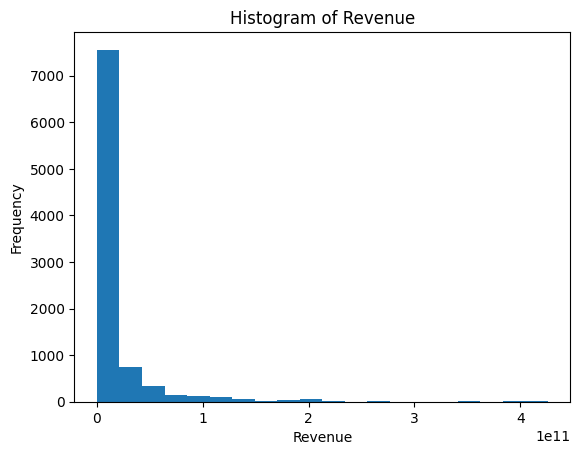

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df_b['Revenue'], bins=20)
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.title('Histogram of Revenue')
plt.show()

<ipython-input-38-10bae479ae7d>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_b.corr()


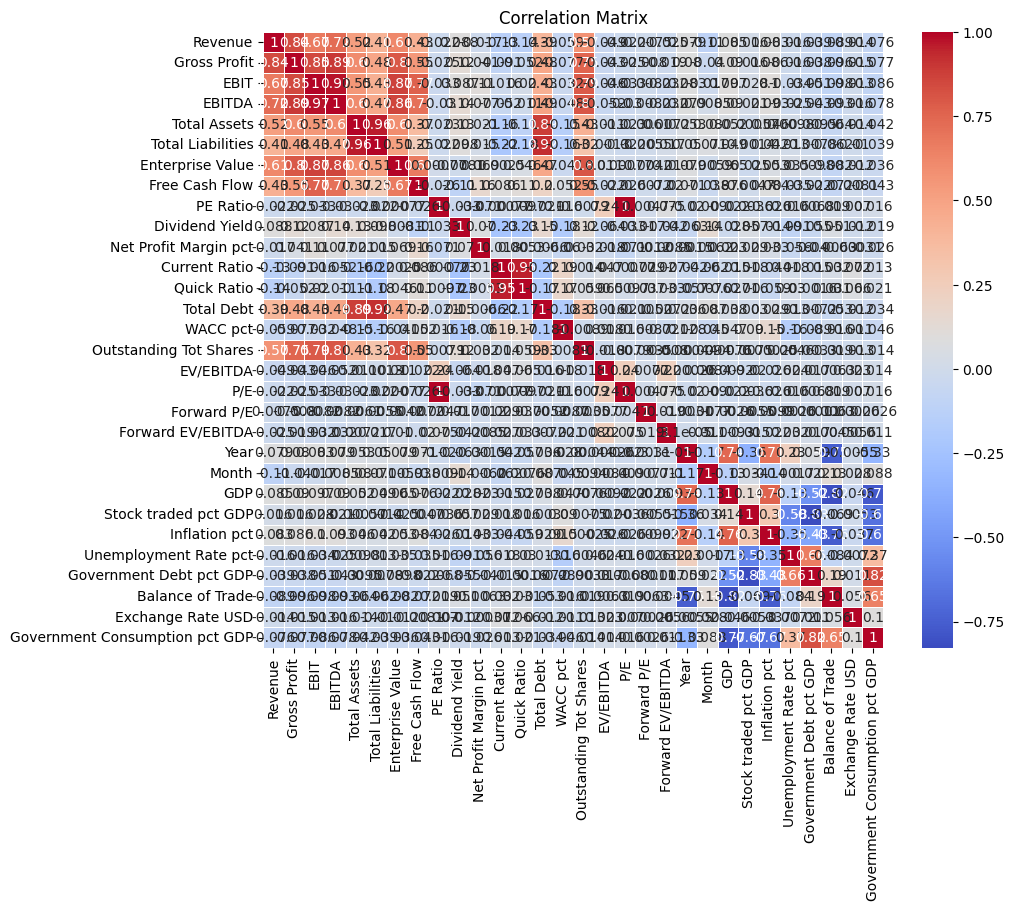

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate the correlation matrix
correlation_matrix = df_b.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))  # Set the size of the plot
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

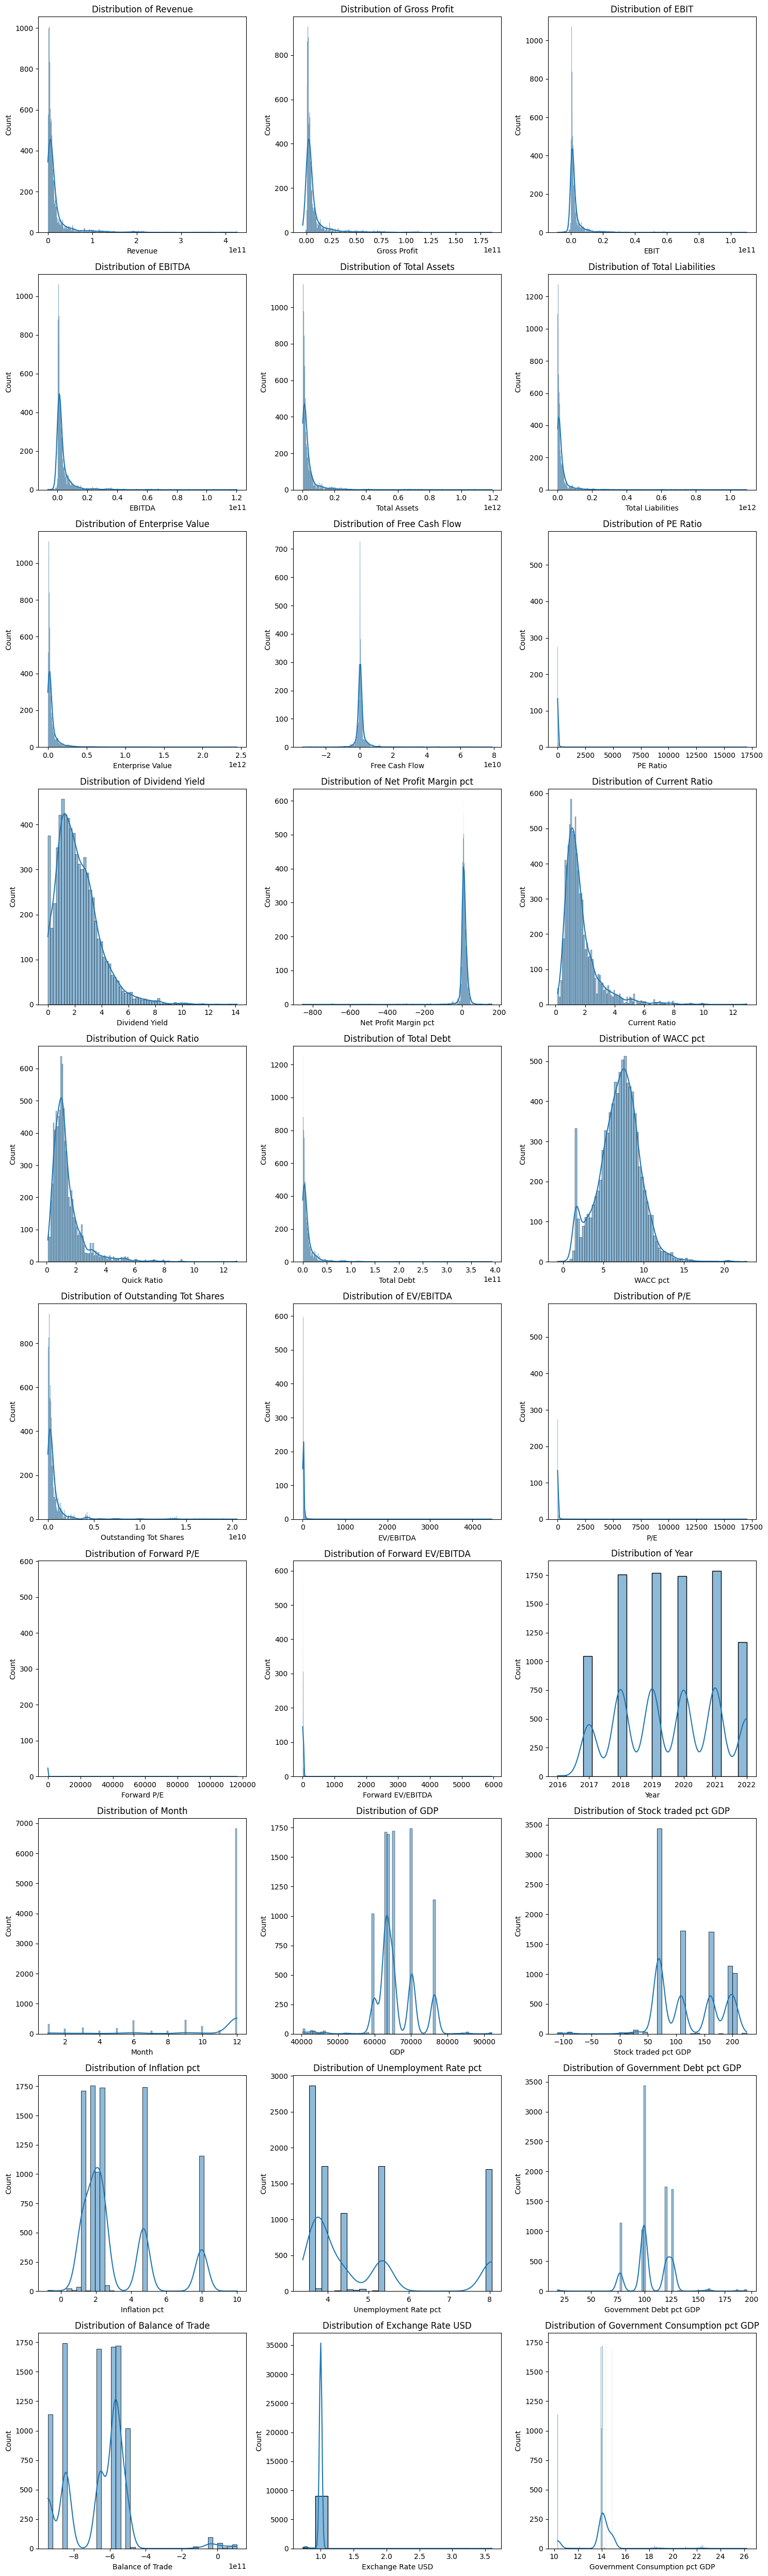

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Select numeric columns for plotting (excluding non-numeric columns)
numeric_columns = df_b.select_dtypes(include='number').columns

# Set the number of columns for subplots
num_cols = 3

# Calculate the number of rows required for subplots
num_rows = (len(numeric_columns) - 1) // num_cols + 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes for easy iteration
axes = axes.ravel()

# Plot the distributions for each numeric column
for i, column in enumerate(numeric_columns):
    sns.histplot(data=df_b, x=column, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].remove()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

## merged Macro and Financials

In [ ]:
df_b.to_csv('sp500_macro_financials.csv')

# Lseg and peers

In [ ]:
import pandas as pd

financials = pd.read_csv('/content/drive/MyDrive/Dissertation_Final /Data/Raw/lseg_financials.csv')
target = pd.read_csv('/content/drive/MyDrive/Dissertation_Final /Data/Raw/lseg_target_variables.csv')
general = pd.read_csv('/content/drive/MyDrive/Dissertation_Final /Data/Raw/lseg_general.csv')
macro = pd.read_csv('/content/drive/MyDrive/Dissertation_Final /Data/Raw/lseg_macro.csv')

In [ ]:
df_a = general.merge(financials, on='Instrument') #DF A = genenral and financials
df_a.columns
print(df_a.shape)

(315, 23)


In [ ]:
df_a = df_a.rename(columns={'Country of Headquarters': 'Country'})
df_a.head(3)

,Instrument,Company Common Name,Country,TRBC Industry Group Name,GICS Sector Name,Currency,Date,Revenue,Gross Profit,EBIT,...,Enterprise Value (Daily Time Series),Free Cash Flow,P/E (Daily Time Series Ratio),Dividend yield,"Net Profit Margin, (%)",Current Ratio,Quick Ratio,Debt - Total,"Weighted Average Cost of Capital, (%)",Common Shares - Outstanding - Total
0,LSEG.L,London Stock Exchange Group PLC,United Kingdom,Investment Banking & Investment Services,Financials,GBP,2022-12-31T00:00:00Z,7.743000e+09,6.679000e+09,1.670000e+09,...,5.363397e+10,1.316000e+09,59.384716,1.282051,10.20276,1.00166,1.00166,8.823000e+09,6.453154,554446680.0
1,LSEG.L,London Stock Exchange Group PLC,United Kingdom,Investment Banking & Investment Services,Financials,GBP,2022-12-31T00:00:00Z,7.743000e+09,6.679000e+09,1.670000e+09,...,5.106187e+10,1.316000e+09,55.849742,1.373211,10.20276,1.00166,1.00166,8.823000e+09,6.442324,554446680.0
2,LSEG.L,London Stock Exchange Group PLC,United Kingdom,Investment Banking & Investment Services,Financials,GBP,2021-12-31T00:00:00Z,6.535000e+09,5.676000e+09,1.406000e+09,...,4.730632e+10,1.039000e+09,46.249068,1.344171,7.05432,1.00284,1.00284,8.369000e+09,7.279936,557360850.0


In [ ]:
df_a.dtypes

Instrument                                object
Company Common Name                       object
Country                                   object
TRBC Industry Group Name                  object
GICS Sector Name                          object
Currency                                  object
Date                                      object
Revenue                                  float64
Gross Profit                             float64
EBIT                                     float64
EBITDA                                   float64
Total Assets                             float64
Total Liabilities                        float64
Enterprise Value (Daily Time Series)     float64
Free Cash Flow                           float64
P/E (Daily Time Series Ratio)            float64
Dividend yield                           float64
Net Profit Margin, (%)                   float64
Current Ratio                            float64
Quick Ratio                              float64
Debt - Total        

In [ ]:
# Convert 'Date' to datetime if it's not already
df_a['Date'] = pd.to_datetime(df_a['Date'])

# Create 'Year' and 'Month' columns
df_a['Year'] = df_a['Date'].dt.year
df_a['Month'] = df_a['Date'].dt.month

df_a

,Instrument,Company Common Name,Country,TRBC Industry Group Name,GICS Sector Name,Currency,Date,Revenue,Gross Profit,EBIT,...,P/E (Daily Time Series Ratio),Dividend yield,"Net Profit Margin, (%)",Current Ratio,Quick Ratio,Debt - Total,"Weighted Average Cost of Capital, (%)",Common Shares - Outstanding - Total,Year,Month
0,LSEG.L,London Stock Exchange Group PLC,United Kingdom,Investment Banking & Investment Services,Financials,GBP,2022-12-31 00:00:00+00:00,7.743000e+09,6.679000e+09,1.670000e+09,...,59.384716,1.282051,10.20276,1.00166,1.00166,8.823000e+09,6.453154,554446680.0,2022,12
1,LSEG.L,London Stock Exchange Group PLC,United Kingdom,Investment Banking & Investment Services,Financials,GBP,2022-12-31 00:00:00+00:00,7.743000e+09,6.679000e+09,1.670000e+09,...,55.849742,1.373211,10.20276,1.00166,1.00166,8.823000e+09,6.442324,554446680.0,2022,12
2,LSEG.L,London Stock Exchange Group PLC,United Kingdom,Investment Banking & Investment Services,Financials,GBP,2021-12-31 00:00:00+00:00,6.535000e+09,5.676000e+09,1.406000e+09,...,46.249068,1.344171,7.05432,1.00284,1.00284,8.369000e+09,7.279936,557360850.0,2021,12
3,LSEG.L,London Stock Exchange Group PLC,United Kingdom,Investment Banking & Investment Services,Financials,GBP,2021-12-31 00:00:00+00:00,6.535000e+09,5.676000e+09,1.406000e+09,...,49.437765,1.187797,7.05432,1.00284,1.00284,8.369000e+09,6.799226,557360850.0,2021,12
4,LSEG.L,London Stock Exchange Group PLC,United Kingdom,Investment Banking & Investment Services,Financials,GBP,2021-12-31 00:00:00+00:00,6.535000e+09,5.676000e+09,1.406000e+09,...,90.661788,1.200101,7.05432,1.00284,1.00284,8.369000e+09,5.813631,557360850.0,2021,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,MKTX.O,Marketaxess Holdings Inc,United States of America,Investment Banking & Investment Services,Financials,USD,2018-12-31 00:00:00+00:00,3.414307e+08,3.227226e+08,1.666403e+08,...,68.703122,0.732943,39.59271,NaN,NaN,1.332596e+06,3.333759,37639917.0,2018,12
311,MKTX.O,Marketaxess Holdings Inc,United States of America,Investment Banking & Investment Services,Financials,USD,2018-12-31 00:00:00+00:00,3.414307e+08,3.227226e+08,1.666403e+08,...,54.018575,0.949853,39.59271,NaN,NaN,1.332596e+06,3.541448,37639917.0,2018,12
312,MKTX.O,Marketaxess Holdings Inc,United States of America,Investment Banking & Investment Services,Financials,USD,2018-12-31 00:00:00+00:00,3.414307e+08,3.227226e+08,1.666403e+08,...,46.488246,0.801259,39.59271,NaN,NaN,1.332596e+06,3.778392,37639917.0,2018,12
313,MKTX.O,Marketaxess Holdings Inc,United States of America,Investment Banking & Investment Services,Financials,USD,2017-12-31 00:00:00+00:00,2.911638e+08,2.763266e+08,1.477311e+08,...,40.355784,0.867007,40.61517,NaN,NaN,6.660720e+05,5.257255,37620736.0,2017,12


In [ ]:
df_b = df_a.merge(macro, left_on=['Country', 'Year'], right_on=['Country', 'Year'])
df_b.columns

Index(['Instrument', 'Company Common Name', 'Country',
       'TRBC Industry Group Name', 'GICS Sector Name', 'Currency', 'Date',
       'Revenue', 'Gross Profit', 'EBIT', 'EBITDA', 'Total Assets',
       'Total Liabilities', 'Enterprise Value (Daily Time Series)',
       'Free Cash Flow', 'P/E (Daily Time Series Ratio)', 'Dividend yield',
       'Net Profit Margin, (%)', 'Current Ratio', 'Quick Ratio',
       'Debt - Total', 'Weighted Average Cost of Capital, (%)',
       'Common Shares - Outstanding - Total', 'Year', 'Month', 'Unnamed: 0',
       'GDP', 'stock traded percentage of gpd',
       'Inflation, consumer prices annual percentage',
       'Unemployment total (pcg of total labor force) (national estimate)',
       ' General government gross debt (% of GDP)', 'Balance of Trade',
       'Official exchange rate (LCU per US$, period average)',
       'General government final consumption expenditure (% of GDP)'],
      dtype='object')

In [ ]:
# Step 3: Rename columns to more understandable names
df_b = df_b.rename(columns={
    'Company Common Name': 'Name',
    'Debt - Total': 'Total Debt',
    'Enterprise Value (Daily Time Series)':'Enterprise Value',
    'Weighted Average Cost of Capital, (%)':'WACC pct',
    'Common Shares - Outstanding - Total' : 'Outstanding Tot Shares',
    'P/E (Daily Time Series Ratio)': 'PE Ratio',
    'Dividend yield': 'Dividend Yield',
    'Net Profit Margin, (%)': 'Net Profit Margin pct',
    'stock traded percentage of gpd':'Stock traded pct GDP',
    'Inflation, consumer prices annual percentage':'Inflation pct',
    'Unemployment total (pcg of total labor force) (national estimate)':'Unemployment Rate pct',
    ' General government gross debt (% of GDP)': 'Government Debt pct GDP',
    'Official exchange rate (LCU per US$, period average)': 'Exchange Rate USD',
    'General government final consumption expenditure (% of GDP)': 'Government Consumption pct GDP'
})

df_b.columns

Index(['Instrument', 'Name', 'Country', 'TRBC Industry Group Name',
       'GICS Sector Name', 'Currency', 'Date', 'Revenue', 'Gross Profit',
       'EBIT', 'EBITDA', 'Total Assets', 'Total Liabilities',
       'Enterprise Value', 'Free Cash Flow', 'PE Ratio', 'Dividend Yield',
       'Net Profit Margin pct', 'Current Ratio', 'Quick Ratio', 'Total Debt',
       'WACC pct', 'Outstanding Tot Shares', 'Year', 'Month', 'Unnamed: 0',
       'GDP', 'Stock traded pct GDP', 'Inflation pct', 'Unemployment Rate pct',
       'Government Debt pct GDP', 'Balance of Trade', 'Exchange Rate USD',
       'Government Consumption pct GDP'],
      dtype='object')

In [ ]:
df_b.shape

(315, 34)

In [ ]:
df_b.to_csv('lseg_fundamental_and_macro.csv')

## Correlation and Distribution

<ipython-input-44-10bae479ae7d>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_b.corr()


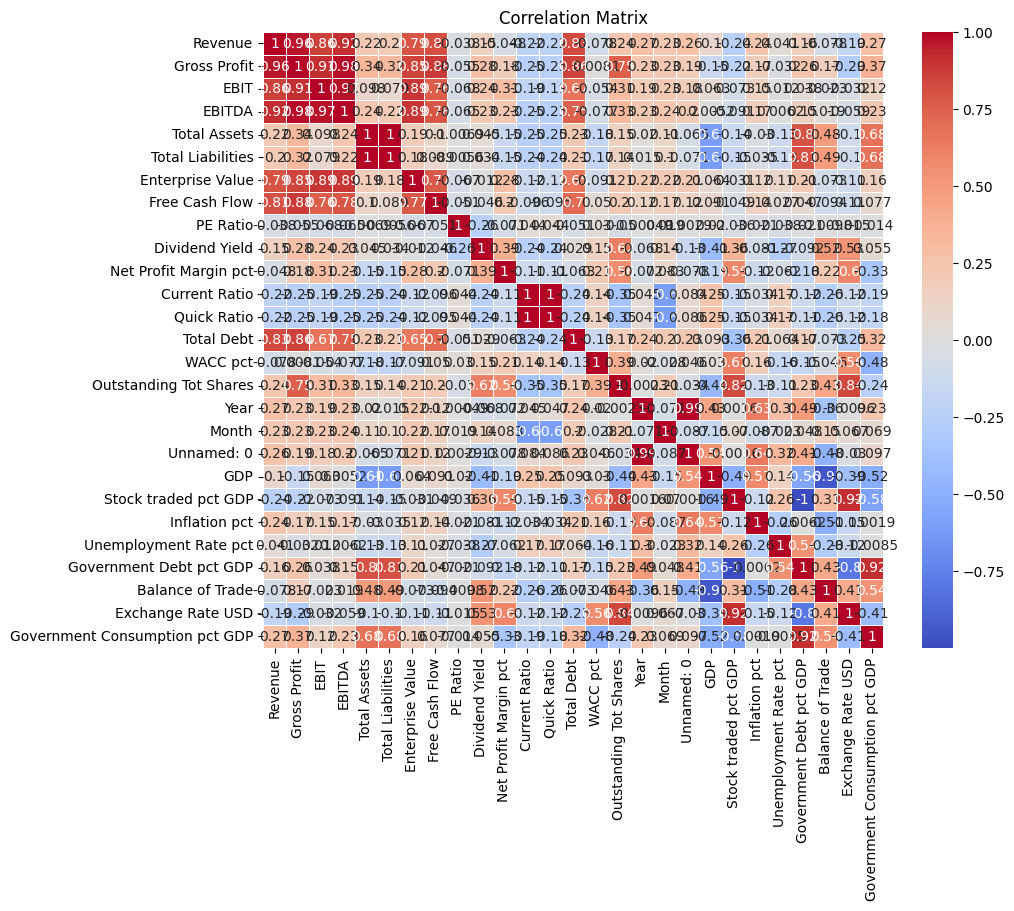

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate the correlation matrix
correlation_matrix = df_b.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))  # Set the size of the plot
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

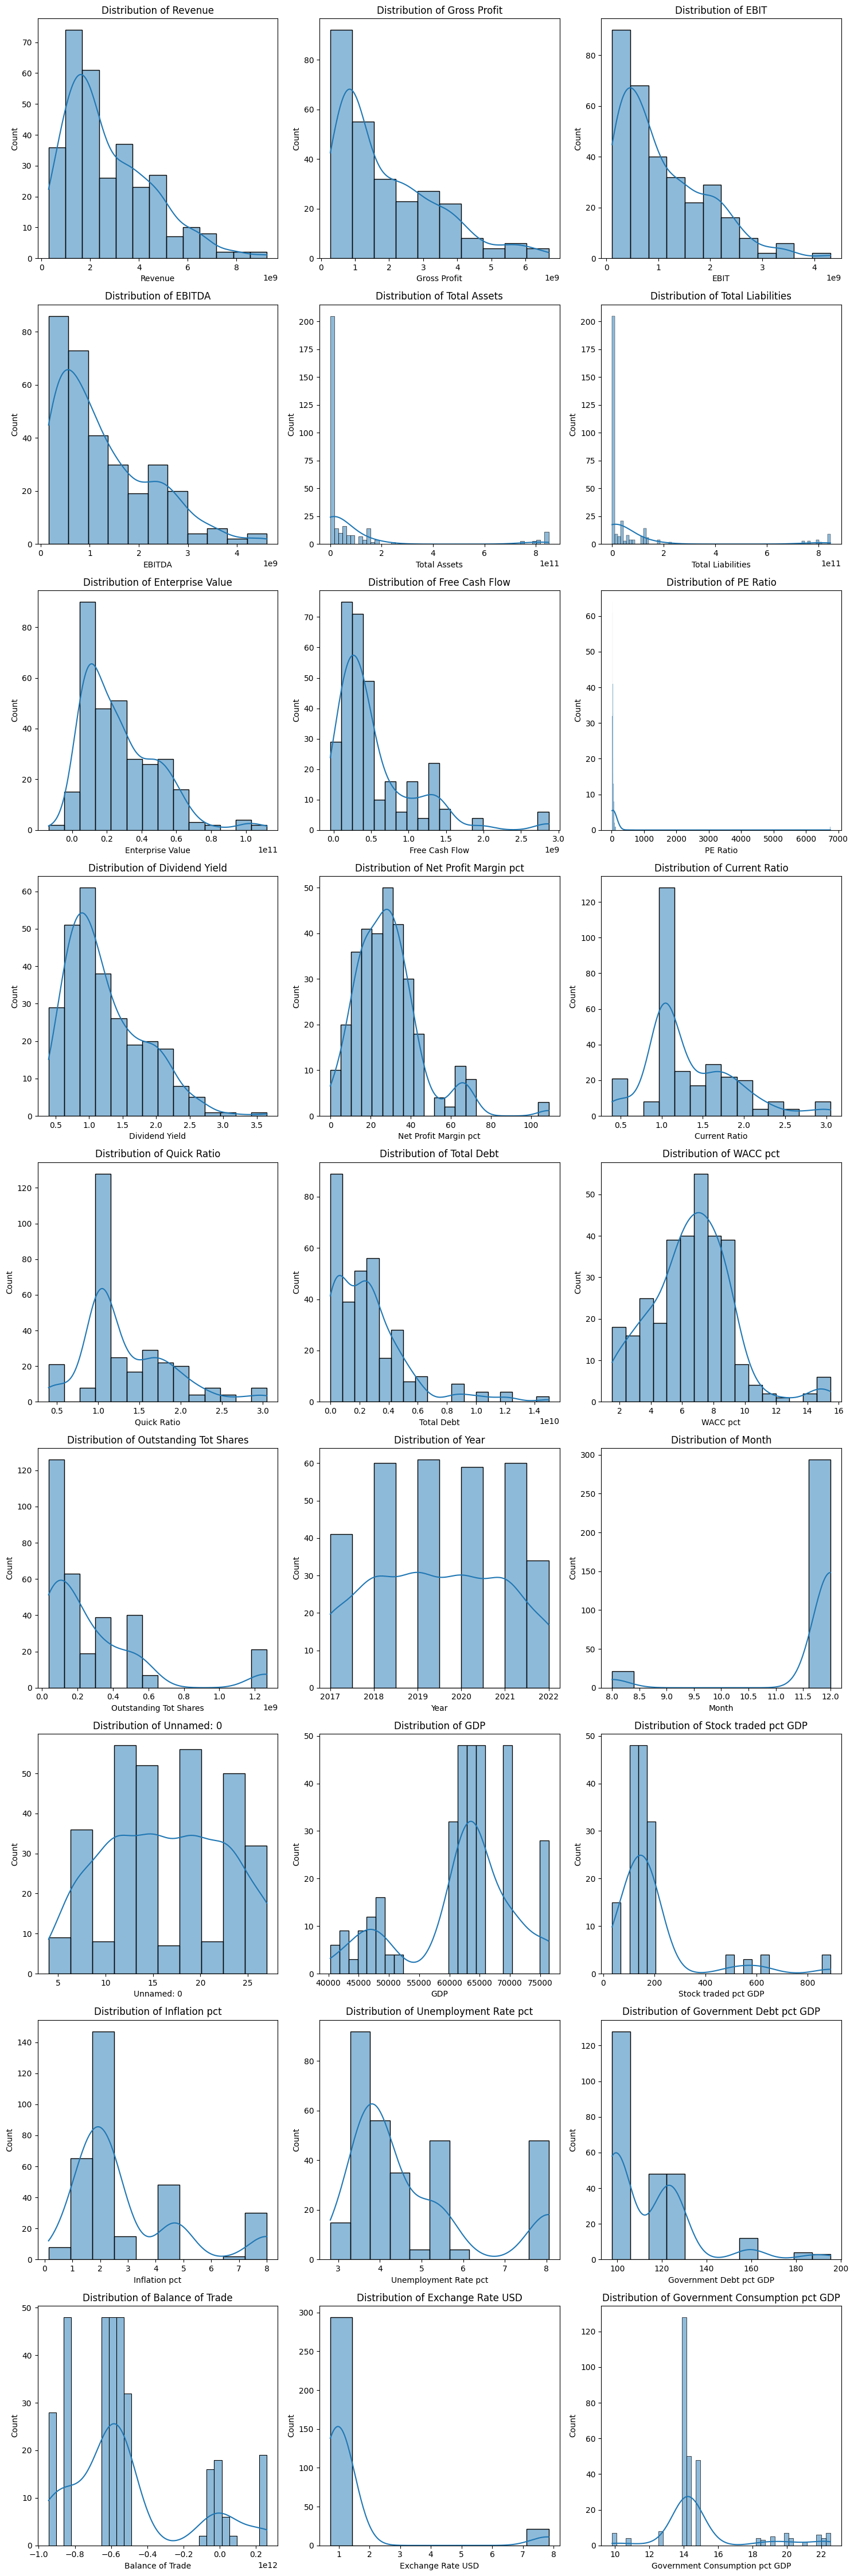

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Select numeric columns for plotting (excluding non-numeric columns)
numeric_columns = df_b.select_dtypes(include='number').columns

# Set the number of columns for subplots
num_cols = 3

# Calculate the number of rows required for subplots
num_rows = (len(numeric_columns) - 1) // num_cols + 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes for easy iteration
axes = axes.ravel()

# Plot the distributions for each numeric column
for i, column in enumerate(numeric_columns):
    sns.histplot(data=df_b, x=column, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].remove()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()